# 统计学习及监督学习概论

作者：杨岱川

时间：2019年9月

github：https://github.com/DrDavidS/basic_Machine_Learning

开源协议：[MIT](https://github.com/DrDavidS/basic_Machine_Learning/blob/master/LICENSE)

## 统计学习简介

统计学习也被称为统计机器学习(statistical machine learning)，其研究对象为数据。

统计学习从数据出发，提取数据的特征，抽象出数据的模型，发现数据中的只是，又回到对数据的分析与预测中去。

## 统计学习的分类

### 基本分类

- 监督学习

- 无监督学习

- 强化学习

### 按模型分类

- 概率模型与非概率模型

- 线性模型与非线性模型

- 参数化模型与参数化模型

### 按算法分类

- 在线学习

- 批量学习

### 按技巧分类

- 贝叶斯学习

- 核方法

## 统计学习方法三要素

统计学习方法由三要素组成：
$$\large 方法 = 模型 + 策略 + 算法 $$

### 方法：损失函数

监督学习问题在假设空间 $ F $ 中选取模型 $ f $ 作为决策函数，对于给定的输入 $ X $，由 $ f $ 给出相应的 $ Y $，这个输出的预测值 $ f(X) $ 与真实值 $ Y $ 可能一致也可能不一致，用一个损失函数（loss function）或者代价函数（cost function）来度量预测错误的程度。

>损失函数是 $ f(X) $ 和 $ Y $ 的非负实值函数，记作 $ L(Y,f(X)) $。

#### 0-1 损失函数(0-1 loss function)

$$\large L(Y,f(X))=\left\{
\begin{aligned}
1,&& Y \not= f(X)& \\
0,&& Y = f(X) &\\
\end{aligned}
\right.
$$



In [1]:
from sklearn.metrics import zero_one_loss

y_pred = [1, 2, 3, 4, 5, 6, 7, 8, 9]
y_true = [2, 2, 3, 4, 5, 6, 5, 8, 7]

print("平均损失值：", zero_one_loss(y_true, y_pred, normalize=True))
print("损失值之和：", zero_one_loss(y_true, y_pred, normalize=False))

平均损失值： 0.33333333333333337
损失值之和： 3


#### 平方损失函数(quadratic loss function)

$$\large L(Y,f(X)) = (Y - f(X))^2 $$

In [2]:
y_pred = [1, 2, 3, 4, 5, 6, 7, 8, 9]
y_true = [1, 2, 3, 4, 5, 6, 5, 8, 11]

def quadratic_loss_sum(y_pred, y_true):
    """
    计算预测值与真实值的平方损失和（吗？）
    
    输入：
    y_pred：预测值列表
    y_true：真实值列表
    
    输出：
    loss_sum：平方损失值之和
    """
    loss_sum = 0
    for i in range(len(y_pred)):
        loss_sum += (y_true[i] - y_pred[i])**2
        #print(y_true[i],"-",y_pred[i],"=",y_true[i] - y_pred[i])
    
    return loss_sum

print("平方损失值之和：", quadratic_loss_sum(y_pred, y_true))
print("平均平方损失值：", quadratic_loss_sum(y_pred, y_true)/len(y_pred))

平方损失值之和： 8
平均平方损失值： 0.8888888888888888


#### 绝对损失函数(absolute loss function)

$$\large L(Y,f(X)) = |Y - f(X)|  $$ 

In [3]:
# 略
# 提示：绝对值可以用 abs() 函数

#### 对数损失函数(logarithmic loss function)

$$\large L(Y,P(Y|X)) = -\log P(Y|X) $$

说明：假设我们建立了一个“猫猫分类器”，它会输出测试图片中是猫的概率 $ P_{right}$ 和不是猫的概率 $ P_{wrong}$，其中 $ P_{right} +  P_{wrong} = 1 $。

我们把“狗”的标签设为0，猫的标签设为1，把第一个概率作为样本分类为0的概率，第二个概率作为样本分类为1的概率。

In [4]:
from sklearn.metrics import log_loss

# 预测概率
y_pred1 = [[0.0, 1.0], [1.0, 0.0], [0.0, 1.0], [0.0, 1.0], [1.0, 0.0]]
y_pred2 = [[1.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 0.0], [0.0, 1.0]]


# 真实值标签
y_true = [1, 0, 1, 1, 0]

print("对数损失值：", log_loss(y_true, y_pred1))

对数损失值： 9.992007221626415e-16


>sklearn中会将数字0转换为1e-15

## 模型评估与模型选择

### 训练误差与测试误差

统计学习的目的是使学到的模型不仅对已知数据而且对未知数据都能有很好的预测能力。

当损失函数给定时，基于损失函数的模型的训练误差和模型的测试误差就自然成为学习方法评估的标准。

### 过拟合与模型选择

如果一味追求提高对训练数据的预测能力，所选模型的复杂度则往往会比真模型更高，这种现象成为过拟合（over-fitting）。

-------------------

**示例**：

用目标函数 $y=sin2{\pi}x$，加上一个正态分布的噪音干扰，用多项式去拟合

from 【例1.1 统计学习方法第二版 20页】

参考：[黄海广的github](https://github.com/fengdu78/lihang-code)

In [5]:
import numpy as np
import scipy as sp
from scipy.optimize import leastsq  # 最小二乘法
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
def real_func(x):
    """目标函数"""
    return np.sin(2*np.pi*x)

def fit_func(p, x):
    """生成多项式
    
    param:
    p：list，待生成的多项式的系数
    x：多项式未知数x的值
    
    return：
    f(x): 多项式代入x后的计算结果
    """
    f = np.poly1d(p)
    # print(f)
    return f(x)

def residuals_func(p, x, y):
    """生成多项式的残差计算
    
    param:
    p：list，待生成的多项式的系数
    x：多项式未知数x的值
    y: 实际观察值（真实值）
    
    return:
    ret: 残差，实际观察值与估计值(拟合值)之间的差
    """
    ret = fit_func(p, x) - y
    return ret

In [7]:
fit_func([1,2,3], 5)

38

生成十个点

In [8]:
# 十个点
x = np.linspace(0, 1, 10)
x_points = np.linspace(0, 1, 1000)
# 加上正态分布噪音的目标函数的值
y_ = real_func(x)
y = [np.random.normal(0, 0.1) + y1 for y1 in y_]

In [9]:
def fitting(M=0):
    """
    M 为多项式的次数
    
    return:
    p_lsq:拟合曲线的多项式系数
    """
    # 随机初始化多项式参数
    p_init = np.random.rand(M + 1)
    # 最小二乘法
    p_lsq = leastsq(residuals_func, p_init, args=(x, y))
    print('Fitting Parameters:', p_lsq[0])

    # 可视化
    plt.plot(x_points, real_func(x_points), label='real')
    plt.plot(x_points, fit_func(p_lsq[0], x_points), label='fitted curve')
    plt.plot(x, y, 'bo', label='noise')
    plt.legend()
    return p_lsq

### M = 0

$ y = b $

Fitting Parameters: [-0.02108652]


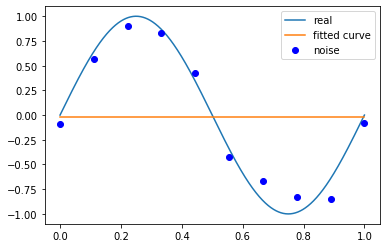

In [10]:
p_lsq_0 = fitting(M=0)

### M = 1

$ y = w_1x + b $ 

Fitting Parameters: [-1.2928325   0.62532973]


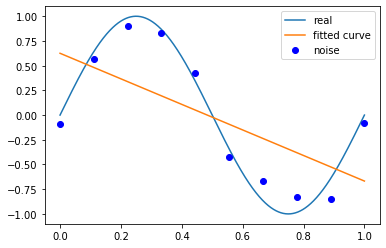

In [11]:
p_lsq_1 = fitting(M=1)

### M = 2

$ y = w_2x^2 + w_1x + b $ 

Fitting Parameters: [-0.66419083 -0.62864168  0.52693109]


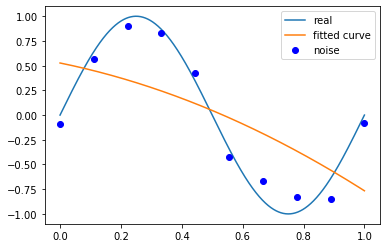

In [12]:
p_lsq_1 = fitting(M=2)

### M = 3

$ y =  w_3x^3 + w_2x^2+ w_1x + b $ 

Fitting Parameters: [ 19.48915629 -29.8979254   10.46333507  -0.14676816]


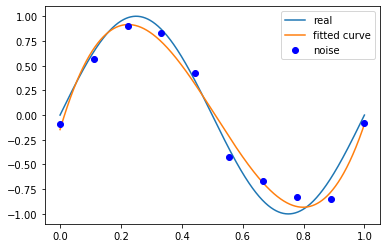

In [13]:
p_lsq_3 = fitting(M=3)

### M = 4

Fitting Parameters: [  2.25572486  14.97770677 -27.08523175   9.9063661   -0.13191566]


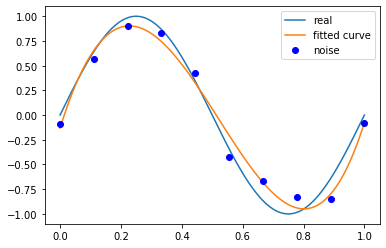

In [14]:
p_lsq_3 = fitting(M=4)

### M = 9

Fitting Parameters: [-3.16001891e+04  1.41518800e+05 -2.65254154e+05  2.70039432e+05
 -1.62102634e+05  5.82738149e+04 -1.21314262e+04  1.30497916e+03
 -4.86038538e+01 -9.52280044e-02]


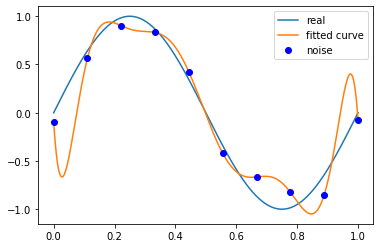

In [15]:
p_lsq_3 = fitting(M=9)

## 正则化

### 模型的取舍

可以明显看出，当 M = 9 的时候，橙色曲线对点有几乎完美的拟合，但是实际上已经偏离了真正的函数曲线了，这就是过拟合。

**问题**：M = 3 和 M = 4 的时候，两条曲线似乎都拟合得不错，那么我们应该选择哪个模型呢？

>参见：奥卡姆剃刀原理

### 正则化的定义

模型选择的典型方法是正则化(regularization)。正则化是结构风险最小化策略的实现，是在经验风险上加一个正则化项或者罚项。

>经验风险 $ R_{emp}(f) $ 是模型关于训练样本集的平均损失。
>
>结构风险 $ R_{srm}(f) $ 在经验风险上加上了表示模型复杂度的正则化项或罚项。
>
>$$\large R_{srm}(f) = \frac{1}{N}\sum^{N}_{i=1}L(y_i,f(x_i))+\lambda J(f) $$
>
>其中 $ J(f) $ 是模型的复杂度。$\lambda \geq 0$ 是系数，用以权衡经验风险和模型复杂度。

也就是说，我们需要一个既简单，训练损失又小的模型。

### 模型复杂度的计算方法

模型复杂度 $ J(f) $可以取不用的形式，比如在上面的问题中，可以取参数向量的 $L_2$ 范数。即：$$\large \lambda J(f) = \frac{\lambda}{2}||w||^2 $$ 

$L_2$范数的计算方法：


$$\large ||x||^2 = \sqrt[]{\sum^{N}_{i=1}{x_i}^2}$$

## 交叉验证

![K折交叉验证](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

### 交叉验证的意义

为了选择更好的模型或者参数，重复地使用数据：把给定的数据进行切分，将切分的数据集组合为训练集和测试集，在此基础上反复训练、测试。

### 简单交叉验证

在后续实验中主要采用的就是这种简单的交叉验证方法。

参见 [sklearn.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split)

### K折交叉验证

又叫S折交叉验证，参见 [sklearn.model_selection.KFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold)

### 分层K折交叉验证

K-Fold的改进型，可返回分层的Fold，并且确保训练集，测试集中各类别样本的比例与原始数据集中相同。参见[sklearn.model_selection.StratifiedKFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold)